In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

data = '/Users/rohanshenoy/Downloads/A,B,CNNS_with_Tim/veggie_heap_training'
test = '/Users/rohanshenoy/Downloads/A,B,CNNS_with_Tim/veggie_heap_testing'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size=32
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size=32
  )

test_ds = tf.keras.utils.image_dataset_from_directory(
  test,
  seed=123,
  image_size=(256,256),
  batch_size=32
)



Found 9835 files belonging to 12 classes.
Using 7868 files for training.
Found 9835 files belonging to 12 classes.
Using 1967 files for validation.
Found 2424 files belonging to 12 classes.


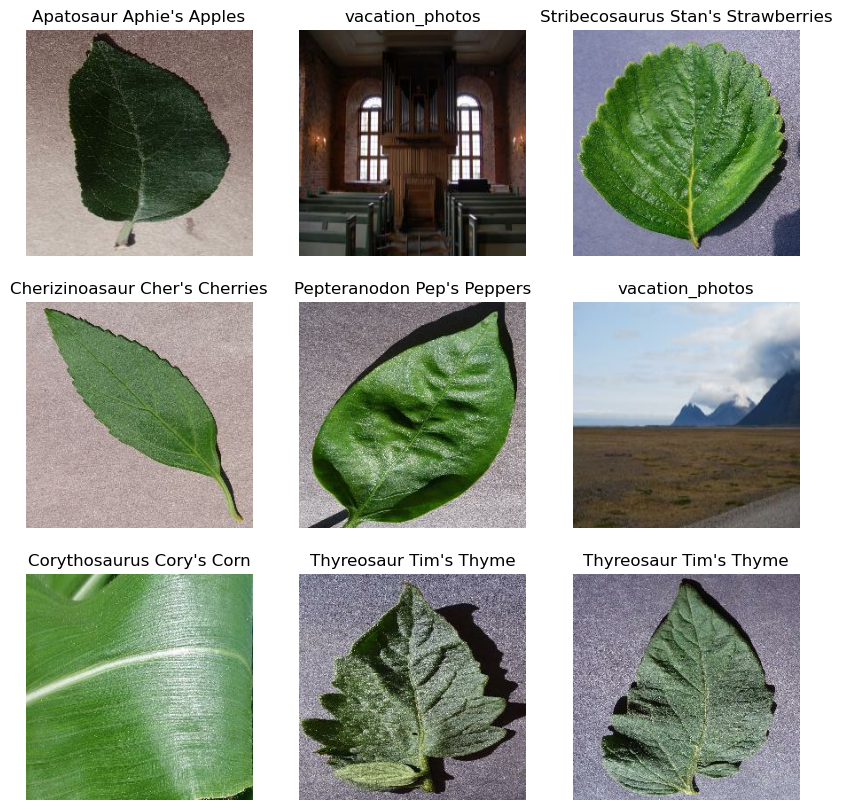

In [3]:
image_batch, label_batch = next(iter(train_ds))
class_names = train_ds.class_names


plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [4]:
cnn = models.Sequential([

    layers.Rescaling(1./255),

    # cnn
    layers.Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(12, activation = 'softmax'),
])

In [5]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [6]:
cnn.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

loss, accuracy = cnn.evaluate(
    test_ds
)


print(f"loss = {loss}\nAccuracy = {accuracy*100}")

Epoch 1/3
246/246 [==============================] - 911s 4s/step - loss: 1.0393 - accuracy: 0.6727 - val_loss: 0.3857 - val_accuracy: 0.8876
Epoch 2/3
246/246 [==============================] - 1915s 8s/step - loss: 0.3264 - accuracy: 0.8992 - val_loss: 0.3369 - val_accuracy: 0.8871
Epoch 3/3
76/76 [==============================] - 153s 2s/step - loss: 1.8099 - accuracy: 0.6283
loss = 1.8099032640457153
Accuracy = 62.83003091812134


In [7]:
# Get predictions for the test set
y_pred = np.argmax(cnn.predict(test_ds), axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

76/76 [==============================] - 153s 2s/step


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [10]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

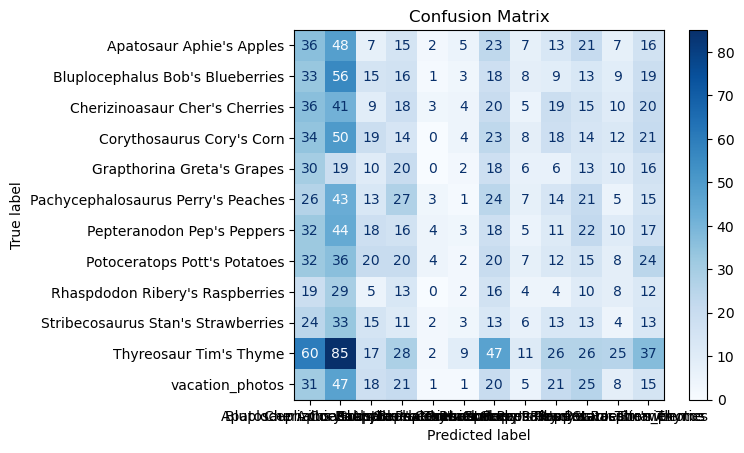

In [11]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()